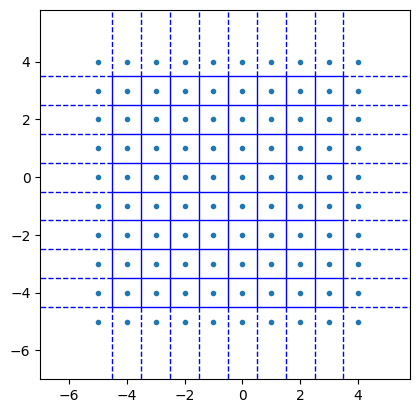

In [340]:
import ForwardPassUtils as fpu
import torch
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, cKDTree
mini = -5
maxi = 5
points = [(x, y) for x in range(mini, maxi) for y in range(mini,maxi)]
voronoi_initial = Voronoi(points)
minX, maxX, minY, maxY = fpu.computeMinMax(voronoi_initial)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
plt.xlim(minX-1, maxX+1)
plt.ylim(minY-1, maxY+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [341]:
import numpy as np

def sdf_rec(p, b):
    #b is half side length to facilitate the computation of the distance in all 4 quadrants
    d = np.abs(p) - np.array(b)/2
    return np.linalg.norm(np.maximum(d, 0)) + min(max(d[0], d[1]), 0)
    #return np.linalg.norm(np.maximum(np.abs(p) - b, 0))

def sdf_box(p,b):
    q = np.abs(p) - b
    return np.linalg.norm(np.maximum(q,0)) + min(max(q[0],max(q[1],q[2])),0)

Distance from point to rectangle: -0.50


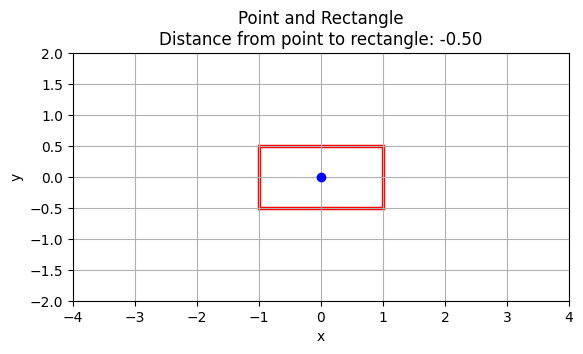

In [342]:
# Example usage
#point position
p = [0.0,0.0]
#rect dimension
b = [2.0, 1.0]
distance = sdf_rec(p, b)
print(f"Distance from point to rectangle: {distance:.2f}")

# Create a rectangle centered at origin with dimensions b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='r', facecolor='none', linewidth=2.5)

# Plotting
fig, ax = plt.subplots()
ax.add_patch(rectangle)
ax.plot(p[0], p[1], 'bo')  # plot the point
ax.set_xlim(-2*b[0], 2*b[0])
ax.set_ylim(-2*b[1], 2*b[1])
ax.set_aspect('equal', adjustable='box')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Point and Rectangle\nDistance from point to rectangle: {distance:.2f}")
plt.grid(True)
plt.show()

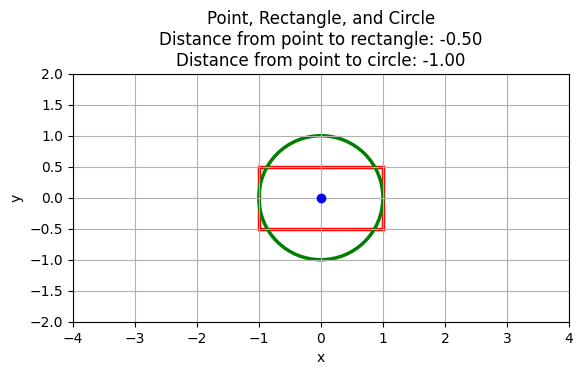

In [343]:
import numpy as np
import matplotlib.pyplot as plt

def sdCircle(p, r):
    return np.linalg.norm(p) - r

r = 1

distance_circle = sdCircle(p, r)

# Create a rectangle centered at origin with dimensions 2*b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='r', facecolor='none', linewidth=2.5)

# Create a circle centered at the origin with radius r
circle = plt.Circle((0, 0), r, edgecolor='g', facecolor='none', linewidth=2.5)

# Plotting
fig, ax = plt.subplots()
ax.add_patch(rectangle)
ax.add_patch(circle)
ax.plot(p[0], p[1], 'bo')  # plot the point
ax.set_xlim(-2*b[0], 2*b[0])
ax.set_ylim(-2*b[1], 2*b[1])
ax.set_aspect('equal', adjustable='box')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Point, Rectangle, and Circle\n"
          f"Distance from point to rectangle: {distance:.2f}\n"
          f"Distance from point to circle: {distance_circle:.2f}")
plt.grid(True)
plt.show()


In [344]:
# Example points
points = [(x, y) for x in range(-5,5) for y in range(-5,5)]
b = [7, 3]


# Add the third dimension (SDF value)
points_with_sdf = [(x, y, sdf_rec(np.array([x, y]), b)) for x, y in points]

# Print the results
for point in points_with_sdf:
    print(point)


(-5, -5, 3.8078865529319543)
(-5, -4, 2.9154759474226504)
(-5, -3, 2.1213203435596424)
(-5, -2, 1.5811388300841898)
(-5, -1, 1.5)
(-5, 0, 1.5)
(-5, 1, 1.5)
(-5, 2, 1.5811388300841898)
(-5, 3, 2.1213203435596424)
(-5, 4, 2.9154759474226504)
(-4, -5, 3.5355339059327378)
(-4, -4, 2.5495097567963922)
(-4, -3, 1.5811388300841898)
(-4, -2, 0.7071067811865476)
(-4, -1, 0.5)
(-4, 0, 0.5)
(-4, 1, 0.5)
(-4, 2, 0.7071067811865476)
(-4, 3, 1.5811388300841898)
(-4, 4, 2.5495097567963922)
(-3, -5, 3.5)
(-3, -4, 2.5)
(-3, -3, 1.5)
(-3, -2, 0.5)
(-3, -1, -0.5)
(-3, 0, -0.5)
(-3, 1, -0.5)
(-3, 2, 0.5)
(-3, 3, 1.5)
(-3, 4, 2.5)
(-2, -5, 3.5)
(-2, -4, 2.5)
(-2, -3, 1.5)
(-2, -2, 0.5)
(-2, -1, -0.5)
(-2, 0, -1.5)
(-2, 1, -0.5)
(-2, 2, 0.5)
(-2, 3, 1.5)
(-2, 4, 2.5)
(-1, -5, 3.5)
(-1, -4, 2.5)
(-1, -3, 1.5)
(-1, -2, 0.5)
(-1, -1, -0.5)
(-1, 0, -1.5)
(-1, 1, -0.5)
(-1, 2, 0.5)
(-1, 3, 1.5)
(-1, 4, 2.5)
(0, -5, 3.5)
(0, -4, 2.5)
(0, -3, 1.5)
(0, -2, 0.5)
(0, -1, -0.5)
(0, 0, -1.5)
(0, 1, -0.5)
(0, 2, 0.5)
(0

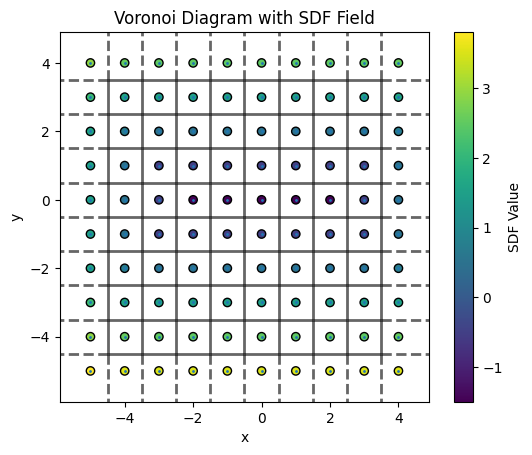

In [345]:
# Separate the points and their SDF values
xy_points = np.array([[x, y] for x, y, sdf in points_with_sdf])
sdf_values = np.array([sdf for x, y, sdf in points_with_sdf])

# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2, line_alpha=0.6, point_size=2)

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='viridis', edgecolor='k')

# Add color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field')
plt.show()


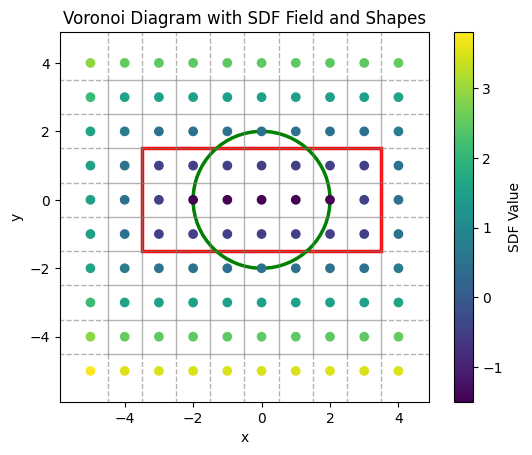

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

r = 2  # Radius for the circle
# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='grey', line_width=1, line_alpha=0.6, point_size=0)

# Create a rectangle centered at origin with dimensions 2*b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='r', facecolor='none', linewidth=2.5)
ax.add_patch(rectangle)

# Create a circle centered at the origin with radius r
circle = plt.Circle((0, 0), r, edgecolor='g', facecolor='none', linewidth=2.5)
ax.add_patch(circle)

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field and Shapes')

#plt.grid(True)
plt.show()


#le target est des points sample sur la surface du cercle 
# il faut identifier tous les vertex qui sont sur la surface du rectangle et donc les sites associés "zero-crossing"



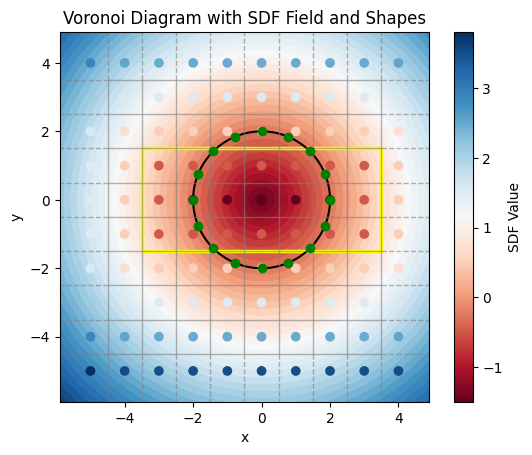

In [347]:
def distance_to_nearest_point(x, y, points):
    distances = np.sqrt((x - points[:, 0, np.newaxis, np.newaxis])**2 + (y - points[:, 1, np.newaxis, np.newaxis])**2)
    return np.min(distances, axis=0)


r = 2  # Radius for the circle
# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Define grid
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = fpu.sdf_circle(X, Y, radius=r)


# Plot Voronoi diagram
fig, ax = plt.subplots()
plt.contourf(X, Y, Z, levels=50, cmap='RdBu')
# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='grey', line_width=1, line_alpha=0.6, point_size=0)

# Create a rectangle centered at origin with dimensions 2*b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='yellow', facecolor='none', linewidth=2.5)
ax.add_patch(rectangle)
#Todo 
# draw the rectangle by doing a zero crossing on the sdf



n_points = 16
theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
target_points = np.array([r*np.cos(theta), r*np.sin(theta)]).T
ax.plot(target_points[:, 0], target_points[:, 1], 'go')  # plot the point

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='RdBu')

# Add color bar

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field and Shapes')



#plt.title('Distance Field from Sampled Points on Circle')
plt.show()


In [348]:
import matplotlib.pyplot as plt

def plot_values(list1, list2, title='Plot of Two Lists', xlabel='X-axis', ylabel='Y-axis', list1_label='List 1', list2_label='List 2'):
    plt.figure()
    
    # Plot the first list
    plt.plot(list1, label=list1_label, marker='o')
    
    # Plot the second list
    plt.plot(list2, label=list2_label, marker='x')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add a legend
    plt.legend()
    #plt.ylim(-2,10)
    # Show the plot
    plt.grid(True)
    plt.show()



In [349]:
#sample target points on the circle surface
n_points = 16
theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
target_points = np.array([r*np.cos(theta), r*np.sin(theta)]).T
print(target_points)

[[ 2.00000000e+00  0.00000000e+00]
 [ 1.84775907e+00  7.65366865e-01]
 [ 1.41421356e+00  1.41421356e+00]
 [ 7.65366865e-01  1.84775907e+00]
 [ 1.22464680e-16  2.00000000e+00]
 [-7.65366865e-01  1.84775907e+00]
 [-1.41421356e+00  1.41421356e+00]
 [-1.84775907e+00  7.65366865e-01]
 [-2.00000000e+00  2.44929360e-16]
 [-1.84775907e+00 -7.65366865e-01]
 [-1.41421356e+00 -1.41421356e+00]
 [-7.65366865e-01 -1.84775907e+00]
 [-3.67394040e-16 -2.00000000e+00]
 [ 7.65366865e-01 -1.84775907e+00]
 [ 1.41421356e+00 -1.41421356e+00]
 [ 1.84775907e+00 -7.65366865e-01]]


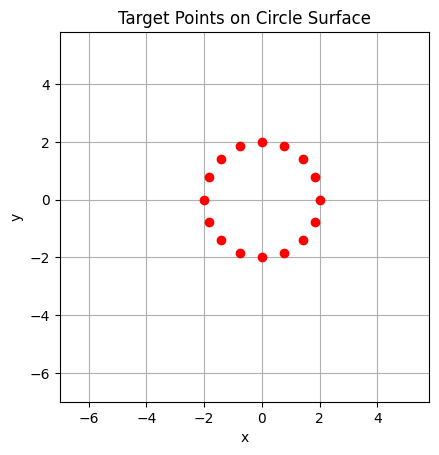

In [350]:
#scatter the target points
fig, ax = plt.subplots()
#ax.add_patch(rectangle)
#ax.add_patch(circle)
ax.plot(target_points[:, 0], target_points[:, 1], 'ro')  # plot the point
plt.xlim(minX-1, maxX+1)
plt.ylim(minY-1, maxY+1)
ax.set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Target Points on Circle Surface")
plt.grid(True)
plt.show()


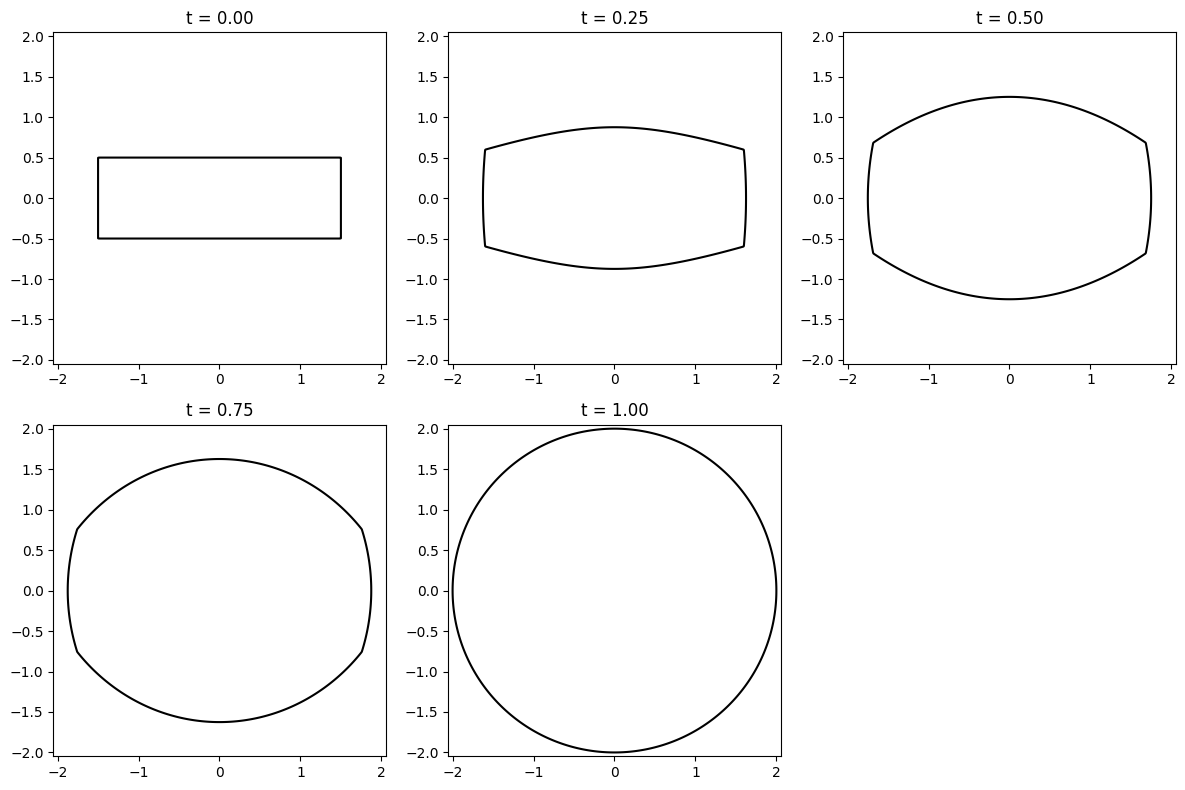

In [351]:

import numpy as np
import matplotlib.pyplot as plt

def sdf_rectangle(x, y, w, h):
    return np.maximum(np.abs(x) - w/2, np.abs(y) - h/2)

def sdf_circle(x, y, r):
    return np.sqrt(x**2 + y**2) - r

def sdf_interpolated(x, y, w, h, r, t):
    sdf_rect = sdf_rectangle(x, y, w, h)
    sdf_circ = sdf_circle(x, y, r)
    return (1 - t) * sdf_rect + t * sdf_circ

# Define grid
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Parameters
w, h = 3.0, 1.0  # Rectangle width and height
r = 2.0          # Circle radius
t_values = np.linspace(0, 1, 5)  # Interpolation steps

# Plotting
plt.figure(figsize=(12, 8))
for i, t in enumerate(t_values):
    Z = sdf_interpolated(X, Y, w, h, r, t)
    plt.subplot(2, 3, i+1)
    plt.contour(X, Y, Z, levels=[0], colors='black')
    plt.title(f"t = {t:.2f}")
    plt.axis('equal')

plt.tight_layout()
plt.show()


In [352]:
# Add the third dimension (SDF value)
points_with_sdf = [(x, y, sdf_rec(np.array([x, y]), b)) for x, y in points]
# Separate the points and their SDF values
xy_points = np.array([[x, y] for x, y, sdf in points_with_sdf])
sdf_values = np.array([sdf for x, y, sdf in points_with_sdf])
#


In [353]:
import numpy as np


def get_frontier(data):
    # Define neighbors based on your grid. For simplicity, let's consider direct neighbors (right, up).
    neighbors = [(1, 0), (-1, 0), (0, 1),(0, -1),(-1,-1),(-1,1),(1,-1),(1,1)]  # (dx, dy)

    # Detect sign changes
    frontier_points = []
    for i, (x, y, sdf) in enumerate(data):
        for dx, dy in neighbors:
            neighbor = data[(data[:, 0] == x + dx) & (data[:, 1] == y + dy)]
            if neighbor.size > 0:
                nx, ny, nsdf = neighbor[0]
                if np.sign(sdf) != np.sign(nsdf):  # Check for sign change
                    # Linear interpolation to estimate the zero crossing point
                    t = abs(sdf) / (abs(sdf) + abs(nsdf))
                    zero_crossing_x = x + t * (nx - x)
                    zero_crossing_y = y + t * (ny - y)
                    frontier_points.append((zero_crossing_x, zero_crossing_y))
    return frontier_points




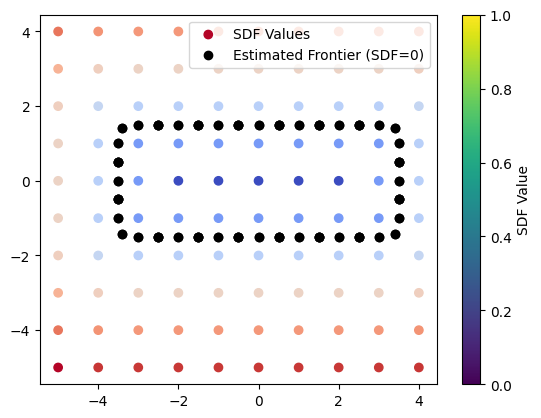

In [354]:
import matplotlib.pyplot as plt

# Sample data: x, y positions and sdf_value
data = np.array(points_with_sdf)
frontier_points = get_frontier(data)
# Unzip frontier points
fx, fy = zip(*frontier_points)

# Plotting the frontier points
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='coolwarm', label='SDF Values')
plt.scatter(fx, fy, color='black', label='Estimated Frontier (SDF=0)')
plt.colorbar(label='SDF Value')
plt.legend()
plt.show()


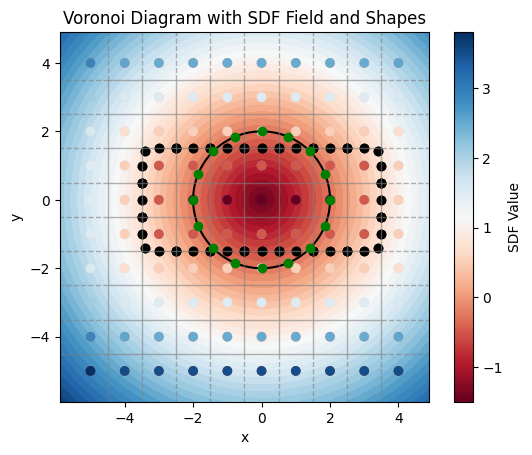

In [355]:
def distance_to_nearest_point(x, y, points):
    distances = np.sqrt((x - points[:, 0, np.newaxis, np.newaxis])**2 + (y - points[:, 1, np.newaxis, np.newaxis])**2)
    return np.min(distances, axis=0)


r = 2  # Radius for the circle
# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Define grid
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = fpu.sdf_circle(X, Y, radius=r)


# Plot Voronoi diagram
fig, ax = plt.subplots()
plt.contourf(X, Y, Z, levels=50, cmap='RdBu')
# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='grey', line_width=1, line_alpha=0.6, point_size=0)

# Create a rectangle centered at origin with dimensions 2*b
# rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='yellow', facecolor='none', linewidth=2.5)
# ax.add_patch(rectangle)
#Todo 
# draw the rectangle by doing a zero crossing on the sdf
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='coolwarm', label='SDF Values')
plt.scatter(fx, fy, color='black', label='Estimated Frontier (SDF=0)')


n_points = 16
theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
target_points = np.array([r*np.cos(theta), r*np.sin(theta)]).T
ax.plot(target_points[:, 0], target_points[:, 1], 'go')  # plot the point

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='RdBu')

# Add color bar

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field and Shapes')



#plt.title('Distance Field from Sampled Points on Circle')
plt.show()


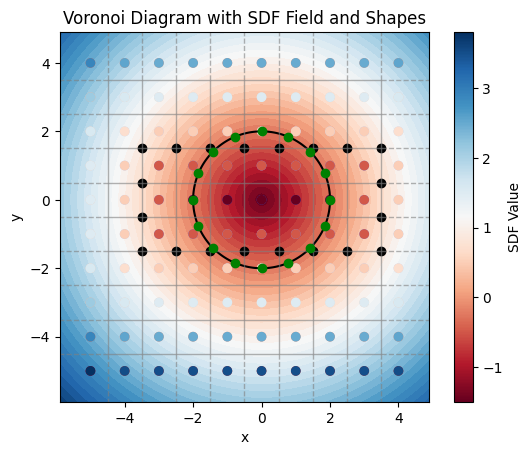

In [356]:
import numpy as np

# Example arrays
frontier_points = np.array(frontier_points)
vertices = np.array(voronoi_initial.vertices)
tolerance = 0.2

# Function to check if two points are within the tolerance
def is_within_tolerance(point1, point2, tolerance):
    return np.linalg.norm(point1 - point2) <= tolerance

# Find common points within the tolerance
common_points = []
for vertex in vertices:
    if any(is_within_tolerance(point, vertex, tolerance) for point in frontier_points):
        common_points.append(vertex)

common_points = np.array(common_points)

# Unzip frontier points
fx, fy = zip(*common_points)

r = 2  # Radius for the circle
# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Define grid
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = fpu.sdf_circle(X, Y, radius=r)


# Plot Voronoi diagram
fig, ax = plt.subplots()
plt.contourf(X, Y, Z, levels=50, cmap='RdBu')
# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='grey', line_width=1, line_alpha=0.6, point_size=0)

# Create a rectangle centered at origin with dimensions 2*b
# rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='yellow', facecolor='none', linewidth=2.5)
# ax.add_patch(rectangle)
#Todo 
# draw the rectangle by doing a zero crossing on the sdf
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='coolwarm', label='SDF Values')
plt.scatter(fx, fy, color='black', label='Estimated Frontier (SDF=0)')


n_points = 16
theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
target_points = np.array([r*np.cos(theta), r*np.sin(theta)]).T
target_points = np.round(target_points, 2)
ax.plot(target_points[:, 0], target_points[:, 1], 'go')  # plot the point

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='RdBu')

# Add color bar

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field and Shapes')



#plt.title('Distance Field from Sampled Points on Circle')
plt.show()


In [357]:
#identify nearest target point for each vertex
tree = cKDTree(target_points)
distances, indices = tree.query(common_points)
for i, index in enumerate(indices):
    print(f"Vertex {i} @ {common_points[i]} is closest to target point {index} @ {target_points[index]} at distance {distances[i]:.2f}")

Vertex 0 @ [3.5 0.5] is closest to target point 0 @ [2. 0.] at distance 1.58
Vertex 1 @ [-2.5  1.5] is closest to target point 7 @ [-1.85  0.77] at distance 0.98
Vertex 2 @ [-3.5  1.5] is closest to target point 7 @ [-1.85  0.77] at distance 1.80
Vertex 3 @ [3.5 1.5] is closest to target point 1 @ [1.85 0.77] at distance 1.80
Vertex 4 @ [-1.5  1.5] is closest to target point 6 @ [-1.41  1.41] at distance 0.13
Vertex 5 @ [-0.5  1.5] is closest to target point 5 @ [-0.77  1.85] at distance 0.44
Vertex 6 @ [-3.5 -1.5] is closest to target point 9 @ [-1.85 -0.77] at distance 1.80
Vertex 7 @ [-3.5 -0.5] is closest to target point 8 @ [-2.  0.] at distance 1.58
Vertex 8 @ [-3.5  0.5] is closest to target point 8 @ [-2.  0.] at distance 1.58
Vertex 9 @ [ 3.5 -1.5] is closest to target point 15 @ [ 1.85 -0.77] at distance 1.80
Vertex 10 @ [ 3.5 -0.5] is closest to target point 0 @ [2. 0.] at distance 1.58
Vertex 11 @ [ 2.5 -1.5] is closest to target point 15 @ [ 1.85 -0.77] at distance 0.98
Ve

In [358]:
import torch
import matplotlib.pyplot as plt


# Convert points to a tensor
data = torch.tensor(points_with_sdf, dtype=torch.float32, requires_grad=True)

# Desired circle parameters
circle_center = torch.tensor([0.0, 0.0], dtype=torch.float32)
circle_radius = torch.tensor(2.0, dtype=torch.float32)

# Optimizer
optimizer = torch.optim.SGD([data], lr=0.01)

# Function to calculate the frontier
def get_frontier_2(data):
    neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    frontier_points = torch.tensor()
    for i, (x, y, sdf) in enumerate(data):
        for dx, dy in neighbors:
            neighbor_idx = ((data[:, 0] == x + dx) & (data[:, 1] == y + dy)).nonzero(as_tuple=True)
            if neighbor_idx[0].size(0) > 0:
                neighbor = data[neighbor_idx[0][0]]
                nx, ny, nsdf = neighbor
                if torch.sign(sdf) != torch.sign(nsdf):
                    # Linear interpolation to estimate the zero crossing point
                    t = torch.abs(sdf) / (torch.abs(sdf) + torch.abs(nsdf))
                    zero_crossing_x = x + t * (nx - x)
                    zero_crossing_y = y + t * (ny - y)
                    torch.cat((frontier_points, torch.stack(list((zero_crossing_x, zero_crossing_y)), dim=0)))
    return frontier_points

# Iterative optimization
num_iterations = 1000

for iteration in range(num_iterations):
    optimizer.zero_grad()
    
    # Get the frontier points
    frontier_points = get_frontier_2(data)
    
    if frontier_points.size(0) == 0:
        print(f"No frontier points detected at iteration {iteration}")
        break
    
    # Calculate the loss (distance of frontier points from the target circle)
    distances_to_circle = torch.norm(frontier_points - circle_center, dim=1)
    loss = torch.mean((distances_to_circle - circle_radius) ** 2)
    
    # Backpropagation
    loss.backward()
    
    # Update the positions
    optimizer.step()

    # Optionally, print the loss to monitor convergence
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss.item()}")

# Final visualization (optional)
# Convert data to numpy for visualization
data_np = data.detach().numpy()

# Plot the adjusted points
plt.scatter(data_np[:, 0], data_np[:, 1], c=data_np[:, 2], cmap='coolwarm', marker='x', label='Adjusted Points')

# Plot the frontier points
if frontier_points.size(0) > 0:
    plt.scatter(frontier_points[:, 0].detach().numpy(), frontier_points[:, 1].detach().numpy(), color='red', label='Frontier Points', s=10)

# Plot the desired circle
circle = plt.Circle(circle_center.detach().numpy(), circle_radius.item(), color='black', fill=False, label='Target Circle')
plt.gca().add_patch(circle)

plt.colorbar(label='SDF Value')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


TypeError: tensor() missing 1 required positional arguments: "data"